## Análisis Financiero: Piloto AI Agrícola (Optimización de Programación de Cosecha) NI

Se presenta el análisis financiero correspondiente al caso de negocio del **Piloto Agrícola de Optimización de Programación de Cosecha de Ingenio Monte Rosa, Ni**.

Este análisis comprende análisis de *Valor Presente Neto, Tasa Interna de Retorno y Payback*, considerando una vida útil de *10 años* para los beneficios del piloto. 


### Estimación de Azúcar Adicional en Función de la Recuperación Global

El piloto agrícola *optimiza* el momento de cosecha de los lotes bajo administración con el objetivo de **maximizar** la función de beneficio (Benefits Function) dado que se selecciona cosechar el *i-ésimo terreno* en el *j-ésimo día* $X_{i,j} \in \{0,1\}$:

$$Benefits = \sum_{i=1}^{n} \sum_{j=1}^{m} X_{i,j} * Area_{i} * TCH_{i,j} * Pol_{i,j}*BeneficioAzucar - \sum_{i=1}^{n} \sum_{j=1}^{m} X_{i,j} * Ferry_{i,j}*CostoFerry$$

*Los detalles de la estimación de mejora sobre la Pol en Caña se encuentran en el documento NI PSO Yield Benefits*   

Existe una mejora en la pol en caña que llega al ingenio, debida al incremento en Pol obtenido por medio de Backtesting sobre la zafra anterior.

La mejora en Pol obtenida *en estos procesos* es de **0.3%** en promedio.

### Beneficio Azúcar
#### Parámetros:

- **Beneficio Azúcar Marginal (USD/qq)**: El beneficio que se obtiene del azúcar que margina (calidad de azúcar que no está maximizada para el ingenio específico).
- **Inversión (USD)**: Monto de la Inversión inicial del piloto.
- **Pol en Caña Actual (%)**: Desempeño de Pol en Caña actual que llega a la Fábrica.
- **Pol de Azúcar (%)**: Pol promedio ponderado del azúcar industrial.
- **Mejora del Proyecto (%)**: Mejora en la Pol en Caña debida al Piloto de AI.
- **Recuperación Global (%)**: Porcentaje de Recuperación de Azúcar en el proceso industrial.
- **Utilización del Piloto (%)**: Proporción del tiempo que se estima opere el Piloto de AI en la zafra, debido a Mantenimientos, Tiempos Perdidos, etc.
- **Toneladas de Caña Bajo Administración (t)**: Total de Caña disponible para moler en la Zafra, que están bajo administración.

In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Parametros
Beneficio_Marginal = 15.80
Inversion = 175000/2
Pol_Caña = 0.1516
Pol_Azucar = 0.9959
Mejora_Proyecto = 0.003
Recuperacion_Global = 0.8246
Utilizacion = 1.00
Toneladas_Caña = 1394500

# diccionario de parametros
dict = {'Beneficio Marginal (USD/qq)': Beneficio_Marginal, 'Inversion Inicial (USD)': Inversion, 'Pol en Caña Actual (%)': Pol_Caña*100, 'Pol Azúcar (%)': Pol_Azucar*100,
        'Mejora Pol del Proyecto (%)': Mejora_Proyecto*100, 'Recuperación Industrial (%)': Recuperacion_Global*100, 'Utilizacion (%)': Utilizacion*100, 'Total de Caña (t)': Toneladas_Caña}

# dataframe final
df = pd.DataFrame([dict])
df

,Beneficio Marginal (USD/qq),Inversion Inicial (USD),Pol en Caña Actual (%),Pol Azúcar (%),Mejora Pol del Proyecto (%),Recuperación Industrial (%),Utilizacion (%),Total de Caña (t)
0,15.8,87500.0,15.16,99.59,0.3,82.46,100.0,1394500


- La Caña Optimizada es el Total de Caña multiplicado por el Porcentaje de Utilización.
- La Pol Total disponible en el Core Sampler es la Pol en Caña multiplicado por la Caña Optimizada.
- El azúcar adicional obtenida es la Pol Total en Core Sampler multiplicada por la Recuperación Industrial dividida por la Pol en Azúcar.

In [3]:
# Estimación de Azúcar Adicional
Caña_Optimizacion = Toneladas_Caña * Utilizacion
Azucar_Adicional = Caña_Optimizacion*Mejora_Proyecto*Recuperacion_Global/Pol_Azucar

print("Azúcar Adicional (t):", np.round(Azucar_Adicional,2))

Azúcar Adicional (t): 3463.92


### Beneficio Económico
Se calcula el beneficio total basado en ingresos por precio y costos de Químicos, Envase y Logística.

#### Parámetros:
- **Precio Azúcar (USD/t)**: Precio por tonelada de azúcar que margina (no maximizada en el ingenio).
- **Costo Químicos (USD/t)**: Costo de Químicos.
- **Costo Envase (USD/t)**: Costo de Envase.
- **Costo Logístico (USD/t)**: Costos Logísticos.


In [4]:
Precio_Azucar = np.round(Beneficio_Marginal*22.0462 - 28.64,2)
Costo_Quimicos = 7.00
Costo_Envase = 6.00
Costo_Logistico = 18.00

# diccionario de parametros
dict = {'Precio de Azúcar (USD/t)': Precio_Azucar, 'Costo de Químicos (USD/t)': Costo_Quimicos, 'Costo de Envase (USD/t)': Costo_Envase,
        'Costo Logístico (USD/t)': Costo_Logistico}

# dataframe final
df = pd.DataFrame([dict])
df

,Precio de Azúcar (USD/t),Costo de Químicos (USD/t),Costo de Envase (USD/t),Costo Logístico (USD/t)
0,319.69,7.0,6.0,18.0


In [5]:
Beneficio_Azucar = (Precio_Azucar - Costo_Quimicos - Costo_Envase - Costo_Logistico) * Azucar_Adicional
print("Beneficio Azúcar (USD):", np.round(Beneficio_Azucar,2))

Beneficio Azúcar (USD): 999997.96


### Valuación de Inversión
Se calcula la Utilidad Neta Marginal basado en el EBITDA Marginal resultado de los flujos Ingreso y Costo. Posteriormente se calcula el Flujo de Caja Libre para Valuación, descontando la Depreciación.

#### Parámetros
- **Vida Util (años)**: Años de Vida útil de la inversión.
- **Costos Marginales (USD)**: Costos relacionados a la operación del piloto de AI.
- **Tiempo de Depreciación (años)**: Años en los que se considera se deprecia hasta un valor terminal de 0 el activo de inversión.
- **Impuestos sobre EBITDA (%)**: Tax Rate sobre EBITDA

#### Costos Marginales
Los costos del piloto contemplan los costos de operar la aplicación, entre ellos los siguientes rubros:
- Costos de **Runtime** (computación) que se pagan a C3 AI.
- Costos de **Optimizador** (licencia de Gurobi).
- Costos de **FTEs** de C3 AI.

#### Costos de Runtime
La distribución histórica de costos de Runtime es como sigue:

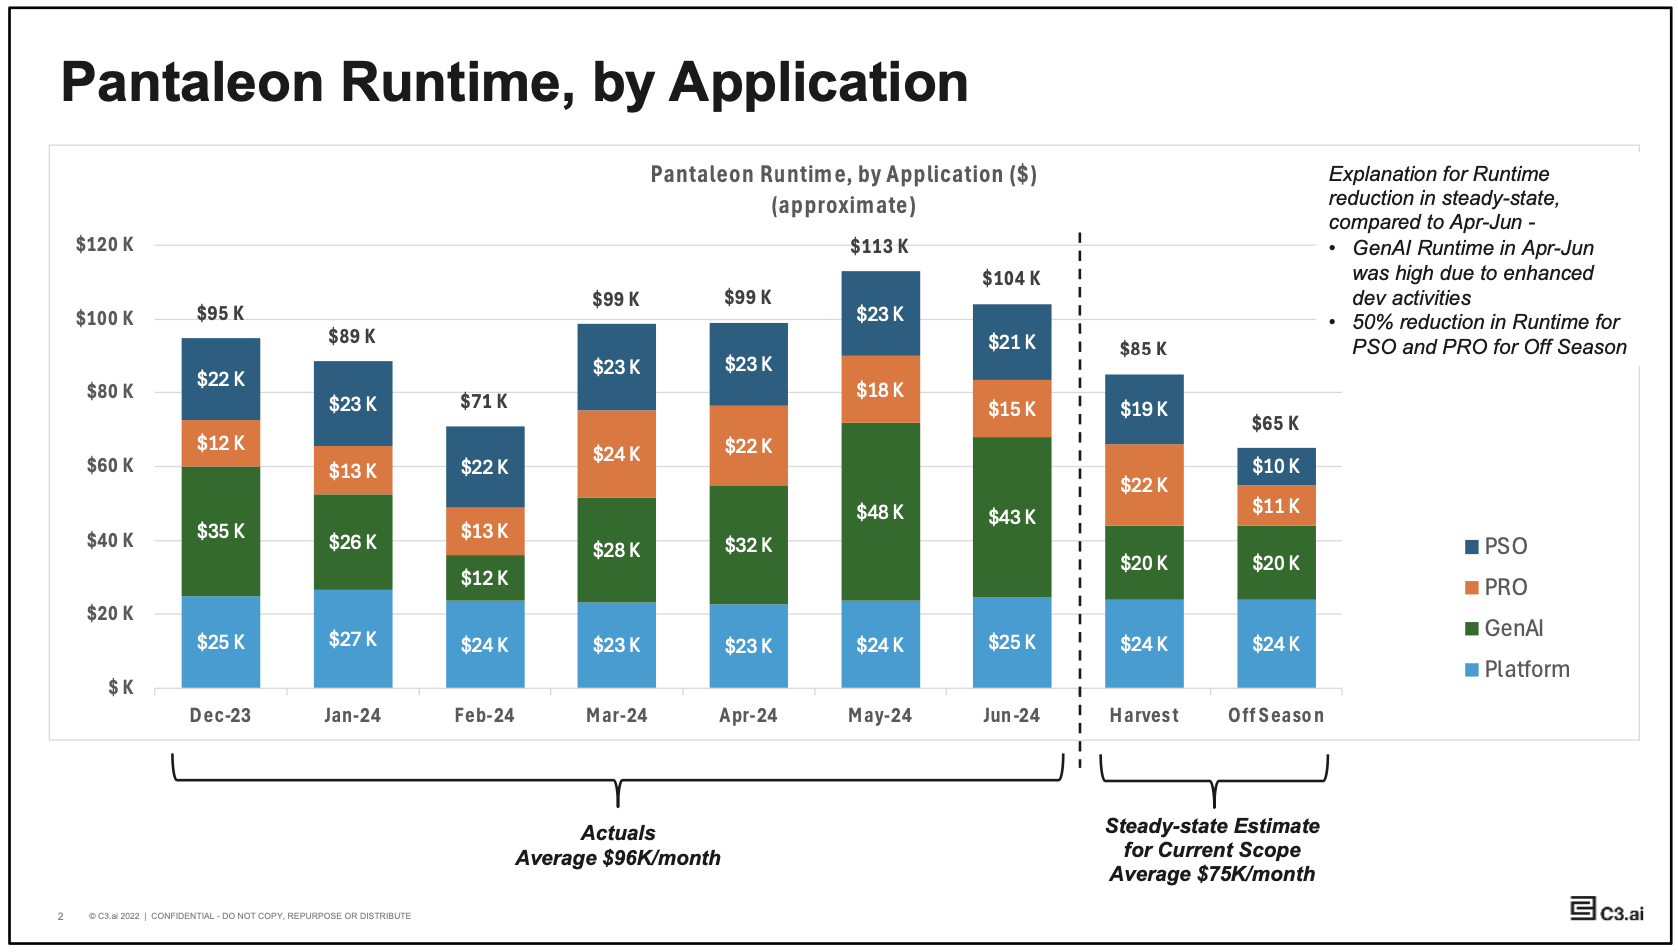

Por lo que correspondería para un año calendario: USD 19,000.00 x 7 meses + USD 10,000.00 x 5 meses + USD 24,000 / 6 pilotos =  **USD 187,000.00 / año**

#### Costos Optimizador y FTE's
Es el valor de la licencia del optimizador y de los FTE's por año, repartidos por la proporción de computación estimada por cada piloto. La proporción de computación es la siguiente:
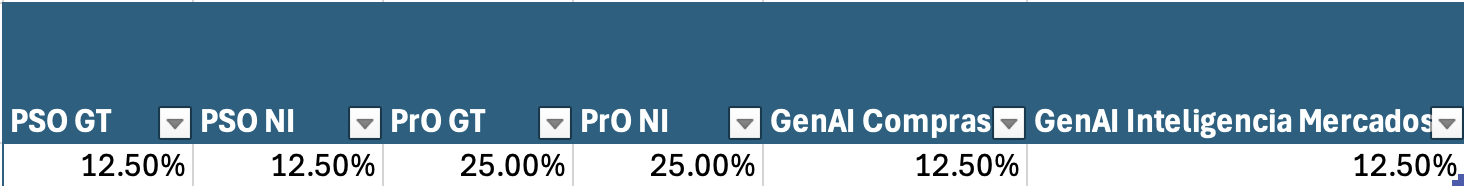

Por lo cual corresponde una proporción del **12.5%** del costo total del optimizador: 
- Año 1: (USD 28,132.00 + USD 2,500,000.00) x 0.125 = **USD 316,016.50**
- Año 2: (USD 28,132.00 + USD 1,750,000.00) x 0.125 = **USD 222,266.50**
- Año 3: (USD 28,132.00 + USD 1,000,000.00) x 0.125 = **USD 128,516.50**
- Año 4 - Año 10: (USD 28,132.00 + USD 0.00) x 0.125 = **USD 3,516.50**

#### Costos Totales
El costo total por año es la suma de **Costos de Runtime, Optimizador y FTE's**:
- Año 1: **USD 503,016.50**
- Año 2: **USD 409,266.50**
- Año 3: **USD 315,516.50**
- Año 4 - Año 10: **USD 190,516.50**

In [6]:
Vida_Util = 10
Costo_Marginal = [503016.50,409266.50,315516.50,190516.50,190516.50,190516.50,190516.50,190516.50,190516.50,190516.50]
Tiempo_Depreciacion = 3
Tax_Rate = 0.25

# diccionario de parametros
dict = {'Vida Útil (años)': Vida_Util, 'Costo Marginal (USD/año)': np.mean(Costo_Marginal), 'Tiempo de Depreciación (años)': Tiempo_Depreciacion,
        'Tax Rate (%)': Tax_Rate*100}

# dataframe final
df = pd.DataFrame([dict])
df

,Vida Útil (años),Costo Marginal (USD/año),Tiempo de Depreciación (años),Tax Rate (%)
0,10,256141.5,3,25.0


In [7]:
# Ingresos
Ingresos_Marginales = np.full((1,Vida_Util),Beneficio_Azucar)

# Costos
Costos_Marginales = Costo_Marginal

# Impuestos
Impuestos = np.full((1,Vida_Util),Tax_Rate)

# EBITDA
EBITDA = Ingresos_Marginales - Costos_Marginales

# Depreciación
Depreciacion = np.full((1,Tiempo_Depreciacion),Inversion/Tiempo_Depreciacion)

# EBITDA Marginal
EBITDA_Marginal = EBITDA

for i in range(Tiempo_Depreciacion):
    EBITDA_Marginal[0,i] = EBITDA[0,i] - Depreciacion[0,i]

# Impuestos Marginales
Impuestos_Marginal = EBITDA_Marginal * Impuestos

# Utilidad Neta
Utilidad_Neta = EBITDA_Marginal - Impuestos_Marginal

### Utilidad Neta

In [8]:
year = 1
for i in Utilidad_Neta[0]:
    print("Utilidad Neta Año",year,": USD",np.round(i,2))
    year += 1

Utilidad Neta Año 1 : USD 350861.09
Utilidad Neta Año 2 : USD 421173.59
Utilidad Neta Año 3 : USD 491486.09
Utilidad Neta Año 4 : USD 607111.09
Utilidad Neta Año 5 : USD 607111.09
Utilidad Neta Año 6 : USD 607111.09
Utilidad Neta Año 7 : USD 607111.09
Utilidad Neta Año 8 : USD 607111.09
Utilidad Neta Año 9 : USD 607111.09
Utilidad Neta Año 10 : USD 607111.09


### EBITDA Marginal

In [9]:
year = 1
for i in EBITDA_Marginal[0]:
    print("EBITDA Marginal Año",year,": USD",np.round(i,2))
    year += 1

EBITDA Marginal Año 1 : USD 467814.79
EBITDA Marginal Año 2 : USD 561564.79
EBITDA Marginal Año 3 : USD 655314.79
EBITDA Marginal Año 4 : USD 809481.46
EBITDA Marginal Año 5 : USD 809481.46
EBITDA Marginal Año 6 : USD 809481.46
EBITDA Marginal Año 7 : USD 809481.46
EBITDA Marginal Año 8 : USD 809481.46
EBITDA Marginal Año 9 : USD 809481.46
EBITDA Marginal Año 10 : USD 809481.46


### Flujos de Caja

In [10]:
# Flujo de Caja
Flujo_Caja = Utilidad_Neta
for i in range(Tiempo_Depreciacion):
    Flujo_Caja[0,i] = Utilidad_Neta[0,i] + Depreciacion[0,i]

Flujo_Caja = np.append([[-Inversion]],Flujo_Caja)

year = 1
for i in Flujo_Caja:
    print("Flujo de Caja Año",year,": USD",np.round(i,2))
    year += 1

Flujo de Caja Año 1 : USD -87500.0
Flujo de Caja Año 2 : USD 380027.76
Flujo de Caja Año 3 : USD 450340.26
Flujo de Caja Año 4 : USD 520652.76
Flujo de Caja Año 5 : USD 607111.09
Flujo de Caja Año 6 : USD 607111.09
Flujo de Caja Año 7 : USD 607111.09
Flujo de Caja Año 8 : USD 607111.09
Flujo de Caja Año 9 : USD 607111.09
Flujo de Caja Año 10 : USD 607111.09
Flujo de Caja Año 11 : USD 607111.09


In [11]:
# Flujo de Caja Acumulado
Flujo_Caja_Acumulado = np.cumsum(Flujo_Caja,axis=0)

year = 1
for i in Flujo_Caja_Acumulado:
    print("Flujo de Caja Acumulado al Año",year,": USD",np.round(i,2))
    year += 1

Flujo de Caja Acumulado al Año 1 : USD -87500.0
Flujo de Caja Acumulado al Año 2 : USD 292527.76
Flujo de Caja Acumulado al Año 3 : USD 742868.02
Flujo de Caja Acumulado al Año 4 : USD 1263520.77
Flujo de Caja Acumulado al Año 5 : USD 1870631.87
Flujo de Caja Acumulado al Año 6 : USD 2477742.96
Flujo de Caja Acumulado al Año 7 : USD 3084854.05
Flujo de Caja Acumulado al Año 8 : USD 3691965.14
Flujo de Caja Acumulado al Año 9 : USD 4299076.23
Flujo de Caja Acumulado al Año 10 : USD 4906187.32
Flujo de Caja Acumulado al Año 11 : USD 5513298.41


### Indicadores

Se calculan los indicadores de inversión

#### Parámetros
- **WACC (%)**:  Weighted Average Cost of Capital.

In [12]:
# WACC
WACC = 0.101

# NPV
NPV = np.round(npf.npv(WACC,Flujo_Caja),2)

# IRR
IRR = np.round(npf.irr(Flujo_Caja),2)

# Profitability Index
P_Index = np.round(NPV / Inversion,2)

# Ratio
Ratio = 1 - Flujo_Caja_Acumulado / Flujo_Caja

#Payback Period
t = min(np.argwhere(np.where(Flujo_Caja_Acumulado > 0, 1, 0)))
Payback_Period = (t[0] - 1 +Ratio[t[0]])


# diccionario de parametros
dict = {'WACC (%)': WACC*100, 'NPV (USD)': NPV, 'IRR (%)': IRR*100, 'Profitability Index': P_Index, 'Payback Period (years)': Payback_Period}

# dataframe final
df = pd.DataFrame([dict])
df

,WACC (%),NPV (USD),IRR (%),Profitability Index,Payback Period (years)
0,10.1,3226603.17,452.0,36.88,0.230246
